<a href="https://colab.research.google.com/github/lauramwichekha/Data-science-introduction/blob/main/Final_copy_of_The_Constructors_group_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Moringa School Project Week Group Presentation (The Constructors)

## Defining the Question

**Specifying the Question**

In this project, we will be working as data scientists for HELP International. Our aim will be to derive useful insights on countries health systems as indicated by various socio-economic and health factors to enable determine which countries that are in dire need of financial assistance.




**Defining the Metric for Success**

Effectively clustering countries with similar characteristics so that we can clearly identify which socio-economic group a country belongs to.


**Understanding the context**

The Constructors are conducting this project on behalf of HELP International.
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of less developed countries with basic amenities and relief during the time of disasters and natural calamities.

HELP International have been able to raise around $ 10 million. Now they need to decide how to use this money strategically and effectively. The team has to make a decision and choose the countries that are in the direst need of aid. Hence, our main objective is to categorise the countries using varoius socio-economic and health factors that determine the overall development of the country and suggest which countries the NGO needs to focus on the most.

We further decided to breakdown the main objective into specific objectives, they are;

1. To identify distinguishing features between clusters.
2. To assess the changes in rate of healthcare spending per GDP across different clusters.  
3. To assess the trend in child mortality rates across different clusters.
4. To assess the trend in life expectancy across different clusters.

**Recording the experimental Design**

*   Data reading and checking
*   External Data Source Validation
*   Data tidying
*   Data Exploration
*   Implementing the solution
*   Challenging the solution
*   Follow Up question
*   Conclusion and Recommendations

**Data Relevance**

The data provided has the relevant features needed to carry out the project.

## Reading the Data

In [ ]:
# importing the needed libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Loading and previewing the train dataset
#
df = pd.read_csv('CountryHealth-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Checking the Data

In [ ]:
# Previewing the top of our dataset
#

df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
# Previewing the bottom of our dataset
#

df.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [ ]:
# Checking if columns are named appropriately
#

df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [ ]:
# Checking the shape of the data
#

df.shape

(167, 9)

In [ ]:
# Checking on the data type
#

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 11.9 KB


In [ ]:
# checking the structure of the dataset to identify anomalies
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Tidying the Data

In [ ]:
# Checking for missing values
#

df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [ ]:
# Checking for duplicates
#

df.duplicated().sum()

0

In [ ]:
# Checking for unique values
#

df.nunique()

country       167
child_mort    139
exports       147
health        147
imports       151
income        156
inflation     156
life_expec    127
total_fer     138
gdpp          157
dtype: int64

In [ ]:
# displaying the unique values in each column

for column in df.columns:
  print("***************************", column, "********************************")
  print("This column has", df[column].nunique(), "unique values, they are shown below:\n")
  print(df[column].unique())
  print('________________________________________________________________________________________________\n')
  print('________________________________________________________________________________________________\n')

*************************** country ********************************
This column has 167 unique values, they are shown below:

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel'
 'Italy' 'Jamaic

## Feature Engineering

In [ ]:
# Creating a list of all countries in their different continents.

Africa = ["Algeria","Angola","Benin","Botswana","Burkina Faso","Burundi","Cabo Verde","Cameroon","Central African Republic",
          "Chad","Comoros","Congo, Dem. Rep", "Congo, Rep.","Cote d'Ivoire","Djibouti","Egypt","Equatorial Guinea","Eritrea",
          "Eswatini (formerly Swaziland)","Ethiopia","Gabon","Gambia","Ghana","Guinea","Guinea-Bissau","Kenya", "Lesotho",
          "Liberia",'Libya',"Madagascar","Malawi","Mali","Mauritania","Mauritius","Morocco","Mozambique","Namibia",
          "Niger","Nigeria","Rwanda","Sao Tome and Principe","Senegal","Seychelles","Sierra Leone","Somalia","South Africa",
          "South Sudan","Sudan","Tanzania""Togo","Tunisia","Uganda","Zambia","Zimbabwe"]

Europe = ["Albania","Andorra", "Armenia","Austria","Azerbaijan","Belarus","Belgium","Bosnia and Herzegovina",
          "Bulgaria","Croatia","Cyprus","Czechia","Denmark","Estonia","Finland","France","Georgia","Germany",
          "Greece","Hungary","Iceland","Ireland","Italy","Kazakhstan","Kosovo","Latvia","Liechtenstein","Lithuania",
          "Luxembourg","Malta","Moldova","Monaco","Montenegro","Netherlands","Macedonia, FYR","Norway","Poland","Portugal",
          "Romania","Russia","San Marino","Serbia","Slovakia","Slovenia","Spain","Sweden","Switzerland","Turkey",
          "Ukraine","United Kingdom","Vatican City"]

Asia = ["Afghanistan","Armenia","Azerbaijan","Bahrain","Bangladesh", "Bhutan","Brunei","Cambodia","China","Cyprus",
        "Georgia","India","Indonesia","Iran","Iraq","Israel","Japan","Jordan","Kazakhstan","Kuwait","Kyrgyzstan","Laos",
        "Lebanon","Malaysia","Maldives","Mongolia","Myanmar","Nepal","North Korea","Oman","Pakistan","Palestine","Philippines",
        "Qatar","Russia","Saudi Arabia","Singapore","South Korea","Sri Lanka","Syria","Taiwan","Tajikistan","Thailand",
        "Timor-Leste","Turkey","Turkmenistan","United Arab Emirates","Uzbekistan","Vietnam","Yemen"]

North_America = ["Antigua and Barbuda","Bahamas","Barbados","Belize","Canada","Costa Rica","Cuba","Dominica",
                 "Dominican Republic","El Salvador","Grenada","Guatemala","Haiti","Honduras","Jamaica","Mexico",
                 "Nicaragua","Panama","Saint Vincent and the Grenadines","United States"]

South_America = ["Argentina","Bolivia","Brazil","Chile","Colombia","Ecuador","Guyana","Paraguay","Peru","Suriname",
                 "Uruguay","Venezuela"]

Australia_and_Oceania = ["Australia","Fiji","Kiribati","Marshall Islands","Micronesia","Nauru","New Zealand","Palau",
                       "Papua New Guinea","Samoa","Solomon Islands","Tonga","Tuvalu","Vanuatu"]

- Created a list of all countries in different continents to be used in feature engineering of the continents column

In [ ]:
# creating a function to fill the continent column with the appropriate continent of the country

def result(country):
  if country in Africa:
    return "Africa"
  elif country in Europe:
    return "Europe"
  elif country in Asia:
    return "Asia"
  elif country in North_America:
    return "N.America"
  elif country in South_America:
    return "S.America"
  else:
    return "Australia_&_Oceania"

# Applying the result function to the dataframe

df["continent"] = df.country.apply(lambda x:result(x))

In [ ]:
# confirming to see if changes have been made.
df.head(3)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,continent
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Asia
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Europe
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Africa


## Exploratory Data Analysis

### Univariate Analysis

Mean, Mode and Median

In [ ]:
# isolating the numerical columns in the dataset

num_cols = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']


In [ ]:
# Obtaining the Mean which is the average value occuring in a dataset

for column in num_cols:
  print("\n\n")
  print(column, "mean is: "+ str(round(df[column].mean(), 2)))
  print(column, "meadian is: "+ str(df[column].median()))
  print(column, "mode is: " + str(df[column].mode()))




child_mort mean is: 38.27
child_mort meadian is: 19.3
child_mort mode is: 0    4.5
dtype: float64



exports mean is: 41.11
exports meadian is: 35.0
exports mode is: 0    23.8
1    35.0
dtype: float64



health mean is: 6.82
health meadian is: 6.32
health mode is: 0    5.07
1    5.20
dtype: float64



imports mean is: 46.89
imports meadian is: 43.3
imports mode is: 0     19.4
1     23.8
2     26.8
3     28.0
4     28.5
5     37.4
6     42.1
7     43.0
8     43.3
9     46.2
10    49.6
11    51.3
12    57.5
13    58.9
14    62.9
15    63.6
dtype: float64



income mean is: 17144.69
income meadian is: 9960.0
income mode is: 0      1390
1     12700
2     15300
3     15400
4     20100
5     21100
6     28300
7     28700
8     29600
9     36200
10    41100
dtype: int64



inflation mean is: 7.78
inflation meadian is: 5.39
inflation mode is: 0    16.6
dtype: float64



life_expec mean is: 70.56
life_expec meadian is: 73.1
life_expec mode is: 0    70.4
1    74.5
2    76.3
3    76.4
4    79.

- Exports, Health, Imports, Income, life expectancy and total fertility had more than one mode.
- The columns were not normally distributed since the mean and medians varied.

Skewness and kurtosis

In [ ]:
# obtiaining the skewness and kurtosis of the numerical columns

for column in num_cols:
  print("\n\n")
  print(column, "skewnes is: "+ str(round(df[column].skew(),2)))
  print(column, "Kurtosis is: "+ str(round(df[column].kurt(),2)))
  print(column + ', std: '+ str(round(df[column].std(),2)))
  print(column + ', var: '+ str(round(df[column].var(),2)))




child_mort skewnes is: 1.45
child_mort Kurtosis is: 1.77
child_mort, std: 40.33
child_mort, var: 1626.42



exports skewnes is: 2.45
exports Kurtosis is: 10.14
exports, std: 27.41
exports, var: 751.42



health skewnes is: 0.71
health Kurtosis is: 0.69
health, std: 2.75
health, var: 7.55



imports skewnes is: 1.91
imports Kurtosis is: 6.76
imports, std: 24.21
imports, var: 586.1



income skewnes is: 2.23
income Kurtosis is: 7.03
income, std: 19278.07
income, var: 371643894.16



inflation skewnes is: 5.15
inflation Kurtosis is: 41.74
inflation, std: 10.57
inflation, var: 111.74



life_expec skewnes is: -0.97
life_expec Kurtosis is: 1.15
life_expec, std: 8.89
life_expec, var: 79.09



total_fer skewnes is: 0.97
total_fer Kurtosis is: -0.19
total_fer, std: 1.51
total_fer, var: 2.29



gdpp skewnes is: 2.22
gdpp Kurtosis is: 5.53
gdpp, std: 18328.7
gdpp, var: 335941419.96


Maximum and Minimums

In [ ]:
# obtaining the maximums and minimums of the numerical columns

for column in num_cols:
  print("\n")
  print("The maximum value in",column ,"is", str(df[column].max()))
  print("The minimum valie in",column ,"is", str(df[column].min()))



The maximum value in child_mort is 208.0
The minimum valie in child_mort is 2.6


The maximum value in exports is 200.0
The minimum valie in exports is 0.109


The maximum value in health is 17.9
The minimum valie in health is 1.81


The maximum value in imports is 174.0
The minimum valie in imports is 0.0659


The maximum value in income is 125000
The minimum valie in income is 609


The maximum value in inflation is 104.0
The minimum valie in inflation is -4.21


The maximum value in life_expec is 82.8
The minimum valie in life_expec is 32.1


The maximum value in total_fer is 7.49
The minimum valie in total_fer is 1.15


The maximum value in gdpp is 105000
The minimum valie in gdpp is 231


Histograms

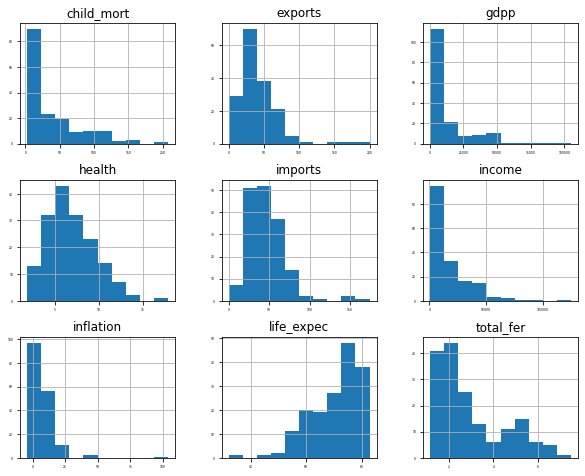

In [ ]:
# histograms for the numerical data
df.hist(figsize=(10,8), sharex=False, sharey=False, xlabelsize=3, ylabelsize=3)
plt.show()


Bar plots

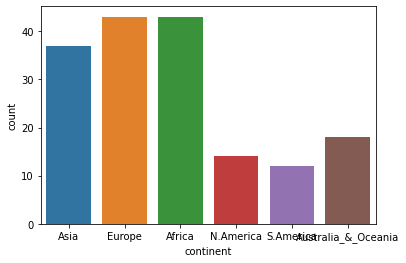

In [ ]:
# Plotting the count of the number of countries in each continent
sns.countplot(df["continent"])

- There are more European and African countries represented.

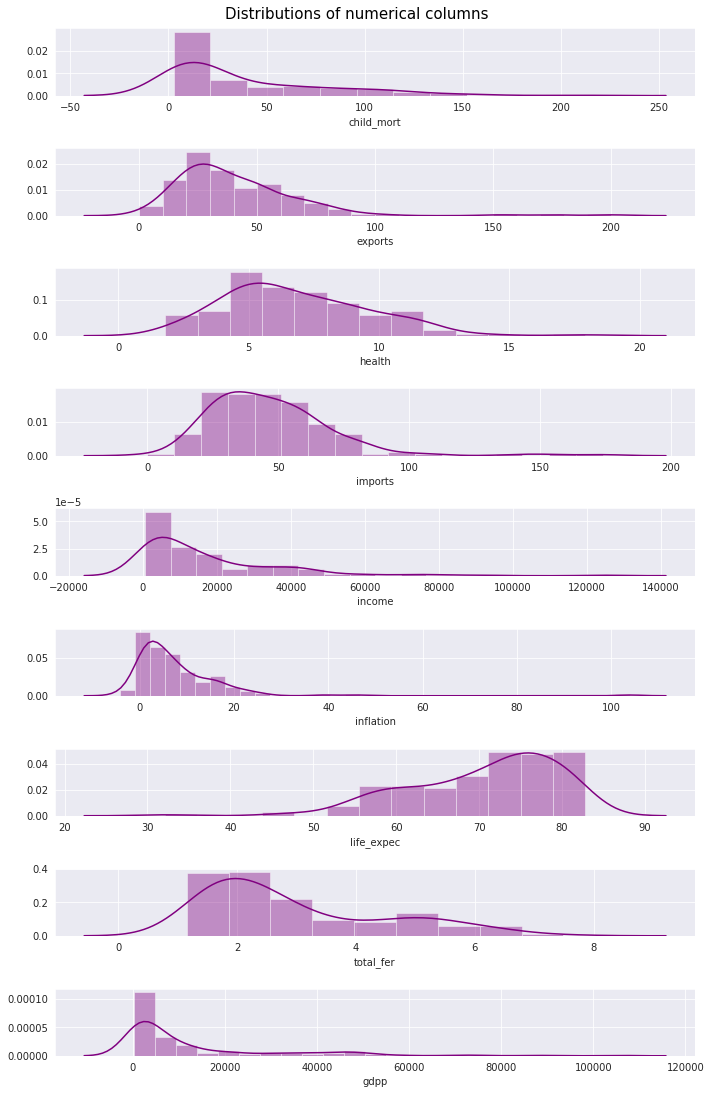

In [ ]:
# distribution plots  for numerical columns

sns.set_style('darkgrid')
fig, axes = plt.subplots(len(num_cols), figsize = (10, 15))
fig.suptitle('Distributions of numerical columns', y= 1.01, color = 'black', fontsize = 15)

for ax, data, name in zip(axes.flatten(), df, num_cols):
  sns.distplot(df[name], ax = ax, kde = True, color = 'purple')
plt.tight_layout()

- All the columns are positively skewed except for the life expectancy column which is negatively skewed.

Box and Whisker Plots

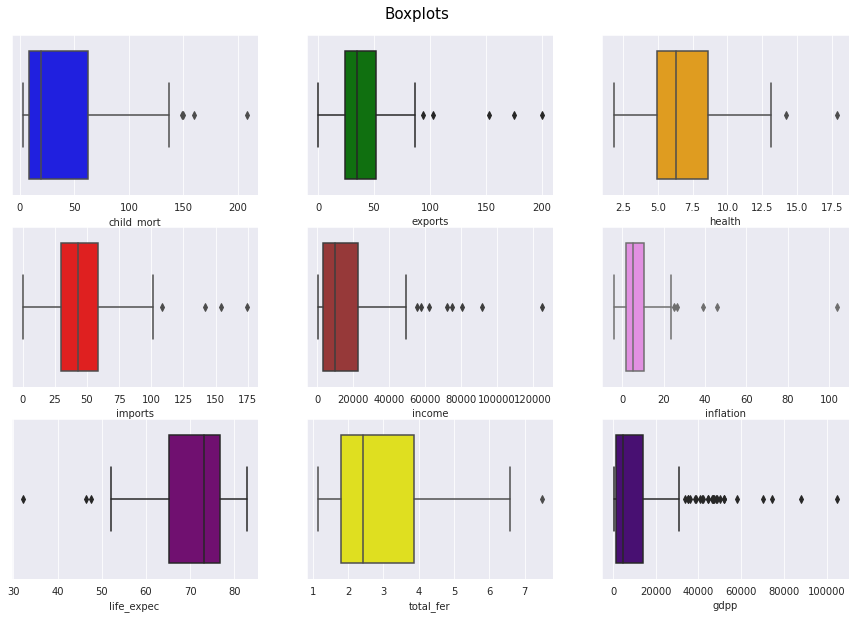

In [ ]:
# Creating a list of colors

colors = ['blue', 'green', 'orange', 'red', 'brown', 'violet', 'purple', 'yellow', 'indigo']

# Plotting the boxplots to check for outliers

fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 10))
plt.suptitle('Boxplots', fontsize = 15, y = 0.92, color = 'black')
for ax, data, column, color in zip(axes.flatten(), df, num_cols, colors):
  sns.boxplot(df[column], ax = ax, color = color)

1. There is atleast one outlier in all the features
2. In case of gdpp and income, there are many outliers and we have limited number of countries(167)

3. Removing outliers is not a good option as per the above conditions since:

    a) These could be actual observations.

    b) Removing them would actually reduce the data frame and countries that are in actual dire need would be excluded.

### Bivariate Analysis

In [ ]:
# Checking how our variables are corelated using a correlation matrix

corrMatrix = df.corr()

corrMatrix

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


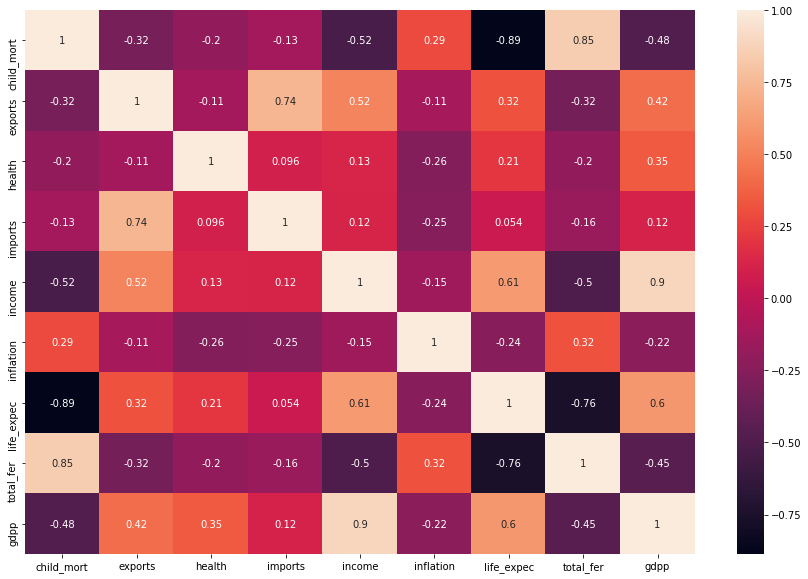

In [ ]:
#  checking for correlation using a heatmap

fig, ax = plt.subplots(figsize=(15,10))

sns.heatmap(df.corr(), annot=True, ax=ax);

1. Life expectancy had a high negative correlation with total fertility rate and child mortality rate.
2. Gdp had a high positive correlation with life expectancy
3. Exports had a high positive correlation with the imports.
4. Imports is positively correlated with the gdp and life expectancy

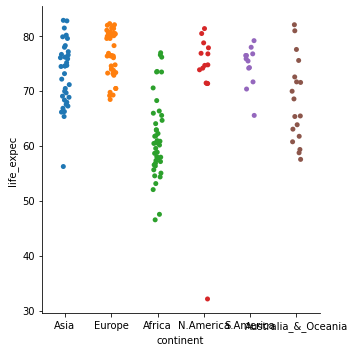

In [ ]:
# plotting the catplot for the continent column against life expectancy

sns.catplot("continent", 'life_expec', data=df)


- Life expectancy in Africa is considerably low as compared to other continents ranging from 45 to approximately 75 years.

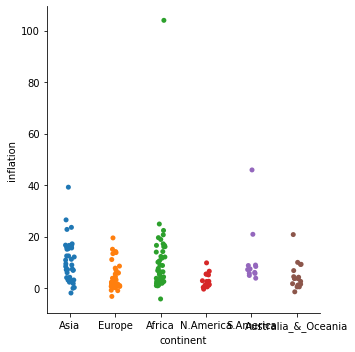

In [ ]:
# generating a catplot to find out the rate of inflation per continent

sns.catplot("continent", 'inflation', data=df)

- All the continents seemed to have lower inflation rates with few outlier countries. There was a country in Africa  which had inflation rates as high as 100.

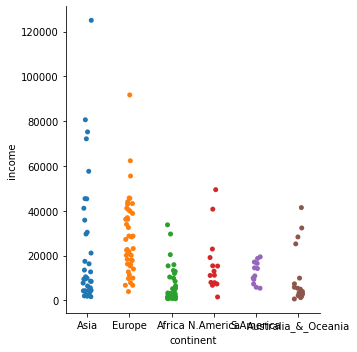

In [ ]:
# generating a catplot to asses the level of income per continent

sns.catplot("continent", 'income', data=df)

- Asia, Europe and North America had higher incomes as compared to Africa, South America and Oceania.

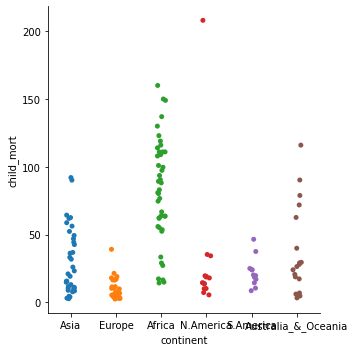

In [ ]:
# generating a catplot to determine the rate of child mortality per continent

sns.catplot("continent", 'child_mort', data=df)

- Africa proves to have a high child mortality rate. North America had a lower mortality rate with an outlier country i.e Haiti which had the highest mortality rate in the continent.

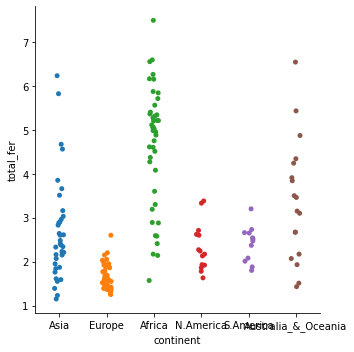

In [ ]:
# generating a catplot to determine the rate of fertility per continent

sns.catplot("continent", 'total_fer', data=df)

- Africa has the highest fertility rate among all the continents represented with most being between 4-7.

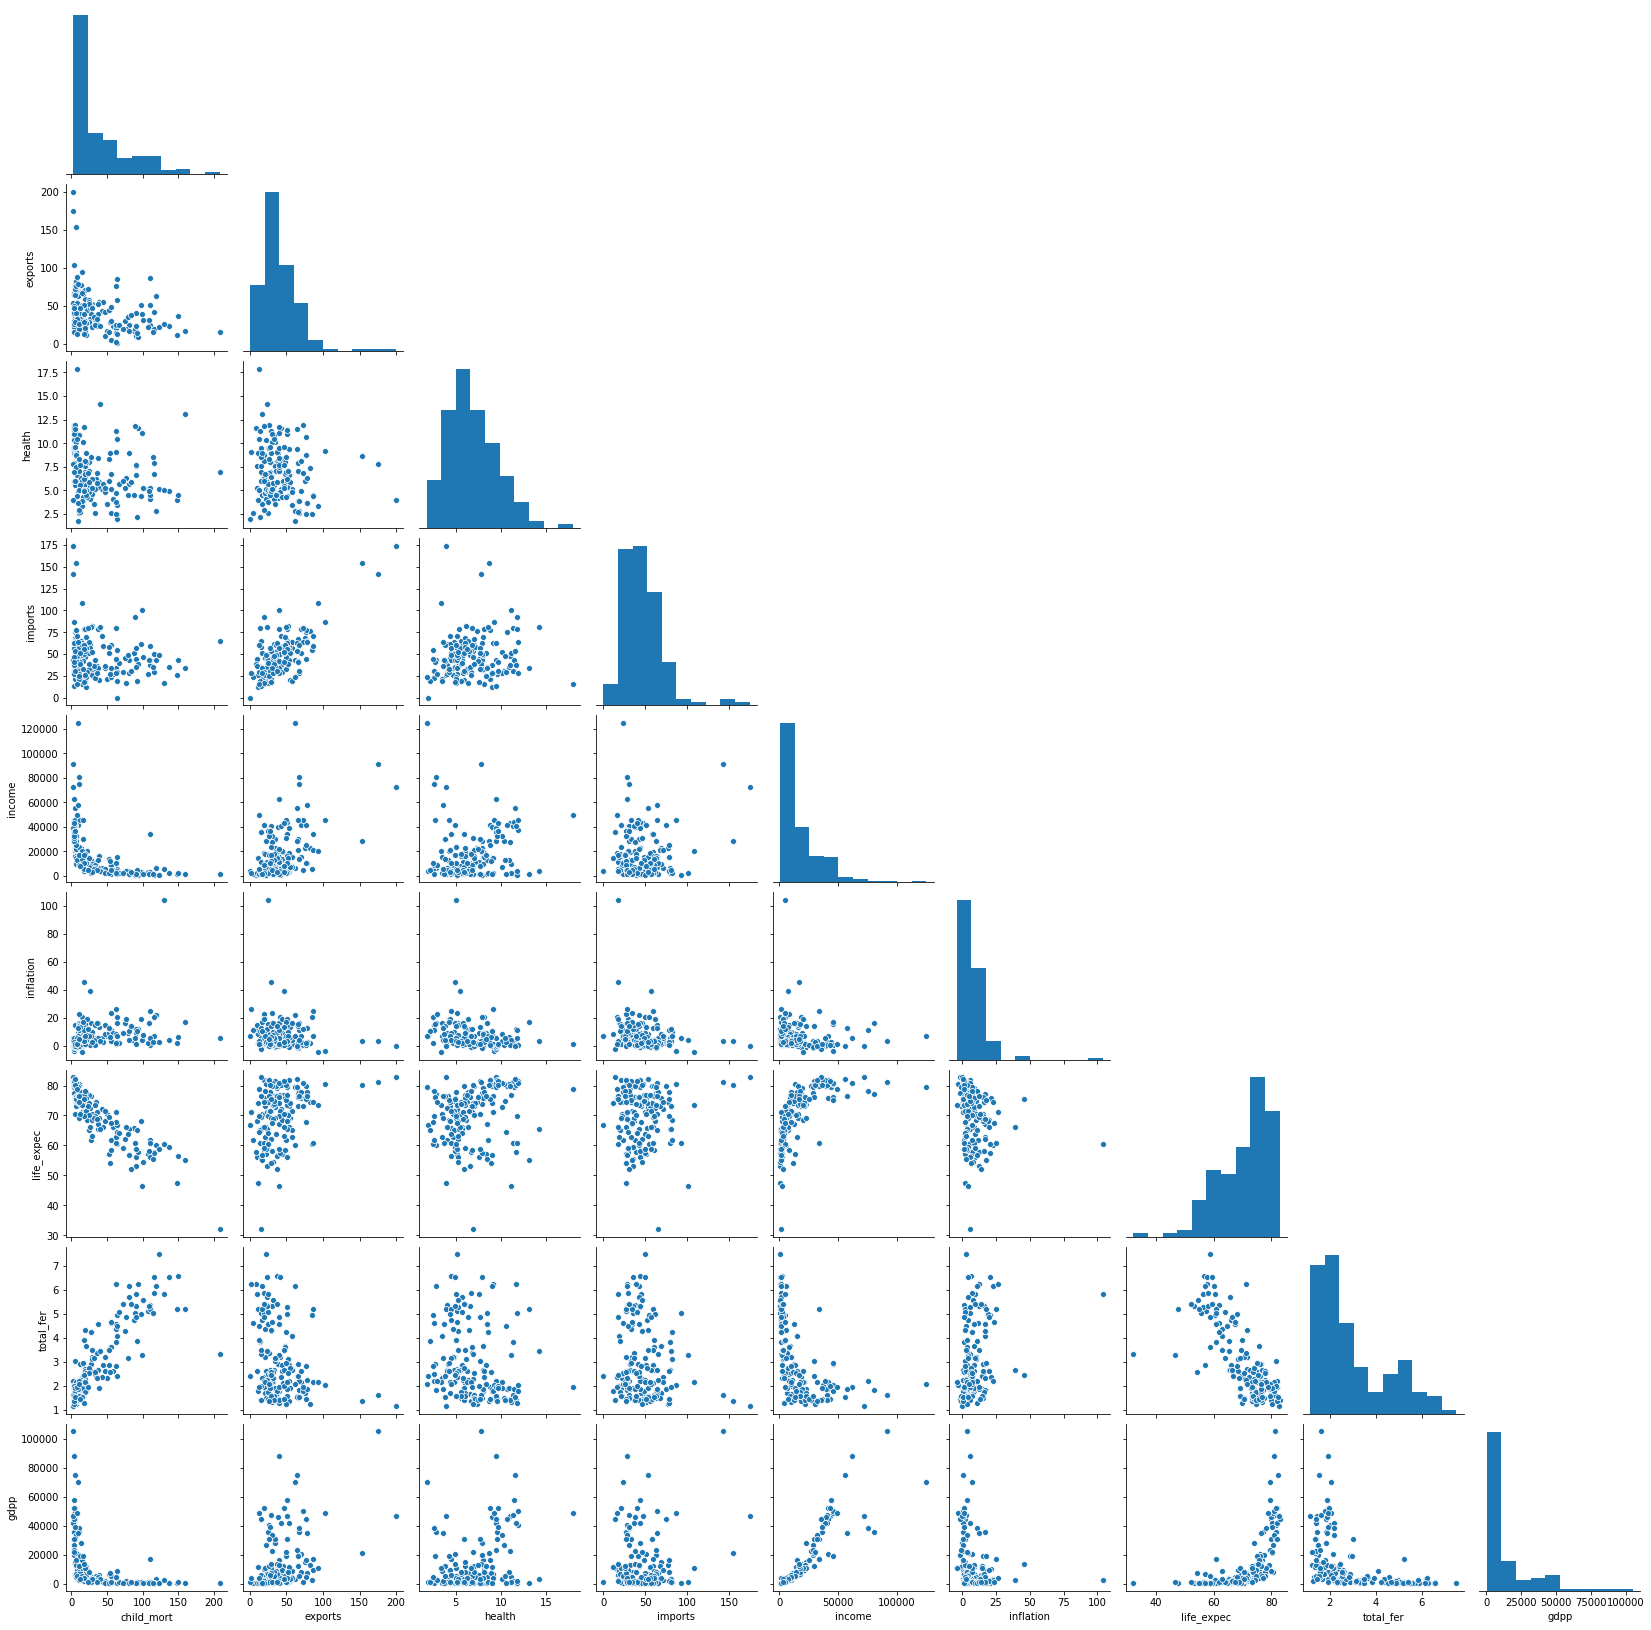

In [ ]:
# generating pair plots for the dataset

sns.pairplot(df, corner = True)
plt.show()

## Normalization

- From the above findings, we saw that most means and median varied significantly(indicated large skew) and therefore it is most appropriate to apply normalization.  A simpler approach which can work in most cases would be applying the natural logarithm.


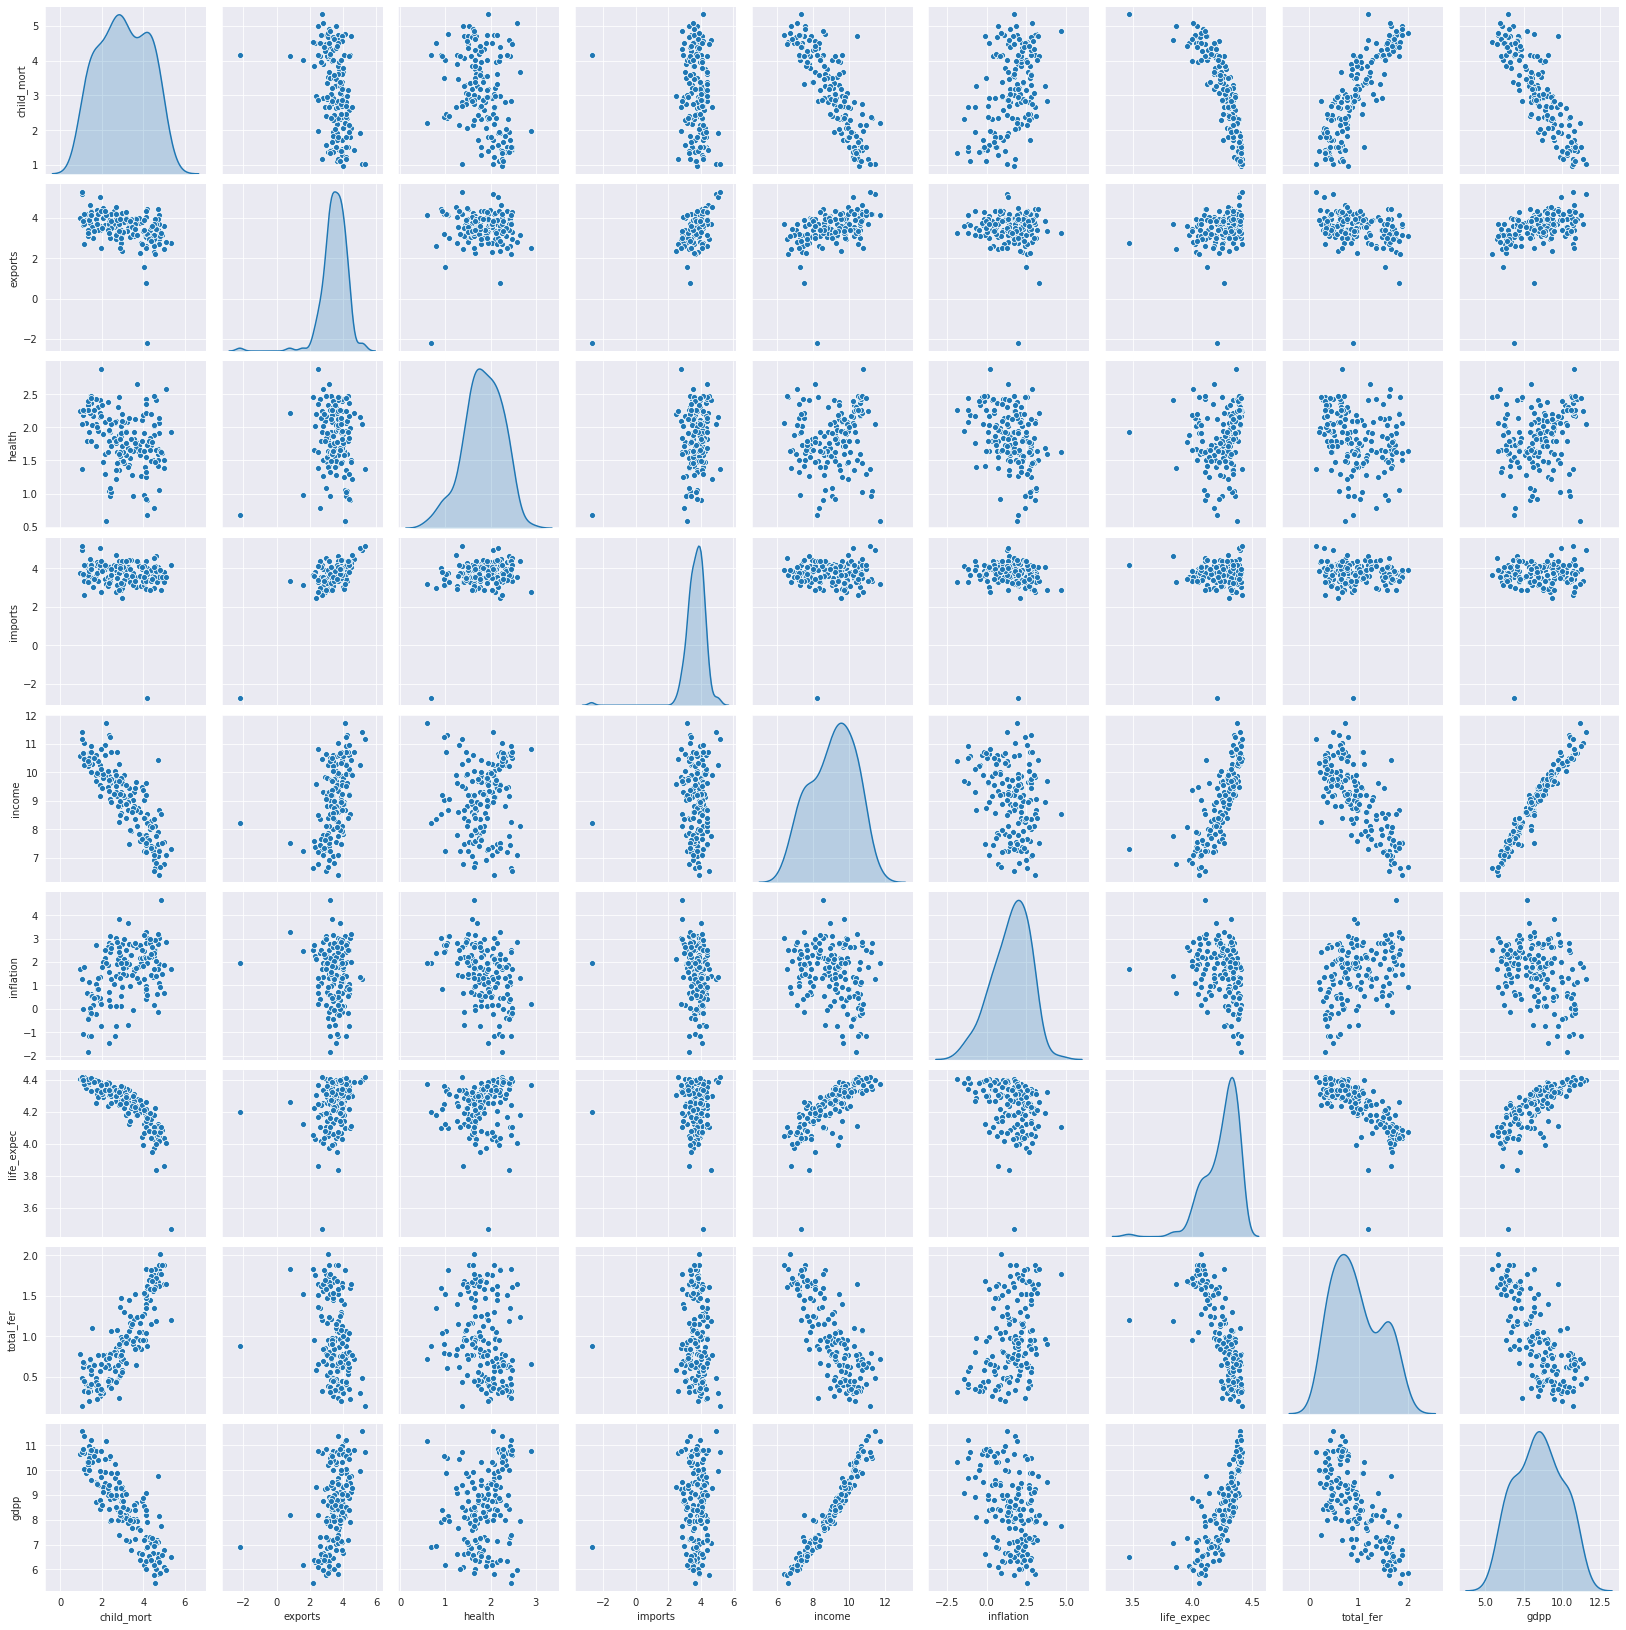

In [ ]:
# Scale the data using the natural logarithm
log_data = np.log(df[num_cols])
# Produce a scatter matrix for each pair of newly-transformed features
_ = sns.pairplot(log_data, diag_kind = 'kde', corner = True))

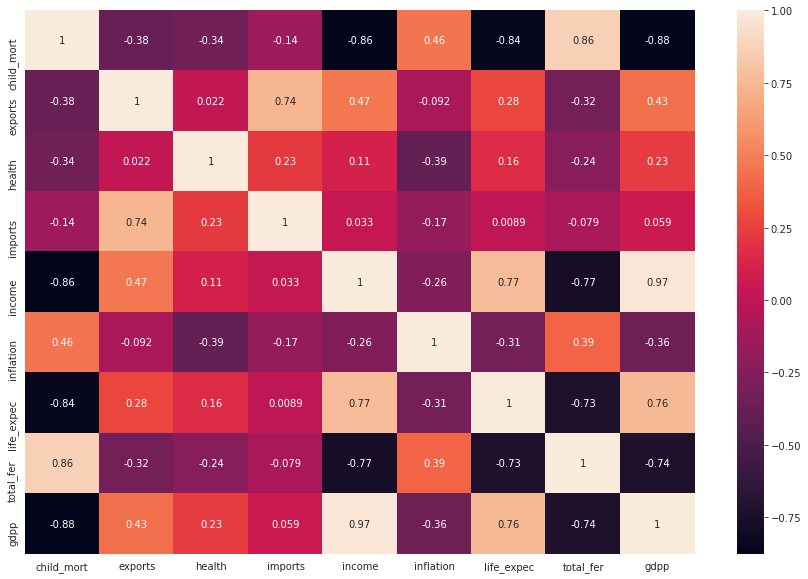

In [ ]:
#  checking for correlation using a heatmap

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(log_data.corr(), annot=True, ax=ax);

## Implementing the Solution

In [ ]:
# we drop the country column

df = country.drop('country',axis = 1)

### Principal Component Analysis.

PCA is a dimensionality reduction technique used on large dataset with multiple dimensions by transforming a large set of variables into a smaller one that still contains most of the information in the original dataset.

In [ ]:
# importing the standard scaler to standardize our data

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
df1=sc.fit_transform(df)

In [ ]:
# importing PCA

from sklearn.decomposition import PCA

#use randomized. we can use auto too

pca = PCA(svd_solver='randomized')
pca.fit(df1)
print('Total number  of principal components =',pca.n_components_)

Total number  of principal components = 9


In [ ]:
# we can display the  principal components

print('Principal Component Matrix :\n',pca.components_)

Principal Component Matrix :
 [[-0.41951945  0.28389698  0.15083782  0.16148244  0.39844111 -0.19317293
   0.42583938 -0.40372896  0.39264482]
 [ 0.19288394  0.61316349 -0.24308678  0.67182064  0.02253553 -0.00840447
  -0.22270674  0.15523311 -0.0460224 ]
 [-0.02954353  0.14476069 -0.59663237 -0.29992674  0.3015475   0.64251951
   0.11391854  0.01954925  0.12297749]
 [ 0.37065326  0.00309102  0.4618975  -0.07190746  0.39215904  0.15044176
  -0.20379723  0.37830365  0.53199457]
 [-0.16896968  0.05761584  0.51800037  0.25537642 -0.2471496   0.7148691
   0.1082198  -0.13526221 -0.18016662]
 [ 0.20062815 -0.05933283  0.00727646 -0.03003154  0.16034699  0.06628537
  -0.60112652 -0.75068875  0.01677876]
 [-0.07948854 -0.70730269 -0.24983051  0.59218953  0.09556237  0.10463252
   0.01848639  0.02882643  0.24299776]
 [-0.68274306 -0.01419742  0.07249683 -0.02894642  0.35262369 -0.01153775
  -0.50466425  0.29335267 -0.24969636]
 [ 0.3275418  -0.12308207  0.11308797  0.09903717  0.61298247 -0.02

Let us check the amount of variance explained by each principal component. They will be arranged in decreasing order of their explained variance ratio.

Variance ratio or co-efficient of dispersion is the ratio of variance to mean.
It is defined only for those models, where the mean is non zero.

In [ ]:
# obtaining the value of the variance of the principal components

var = pca.explained_variance_ratio_
print(var)

[0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235
 0.0126043  0.00981282 0.00743056]


Text(0, 0.5, 'Explained Variance Ratio')

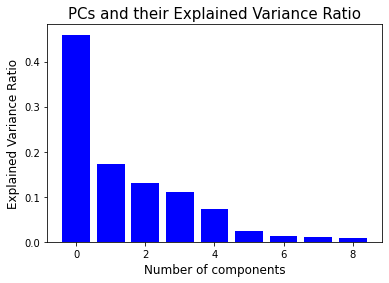

In [ ]:
# Plot explained variance ratio for each PC

plt.bar([i for i, _ in enumerate(var)],var,color='blue')
plt.title('PCs and their Explained Variance Ratio', fontsize=15)
plt.xlabel('Number of components',fontsize=12)
plt.ylabel('Explained Variance Ratio',fontsize=12)

In [ ]:
#Cumulative Variance explained by each PC
import numpy as np
cum_var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(cum_var)

[45.95 63.13 76.13 87.18 94.52 97.   98.26 99.24 99.98]


Using these cumulative variance ratios for all PCs, we will now draw a scree plot.
It is used to determine the number of principal components to keep in this principal component analysis.

Text(0, 0.5, 'Cumulative Explained Variance Ratio')

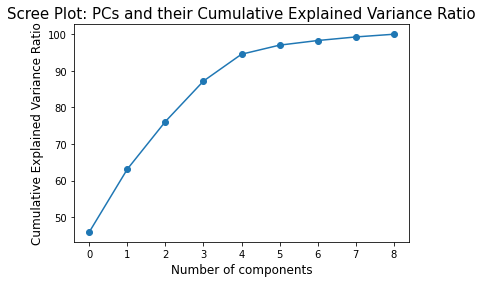

In [ ]:
# generating the Scree Plot

plt.plot(cum_var, marker='o')
plt.title('Scree Plot: PCs and their Cumulative Explained Variance Ratio',fontsize=15)
plt.xlabel('Number of components',fontsize=12)
plt.ylabel('Cumulative Explained Variance Ratio',fontsize=12)

Optimal number of principal components are chosen by picking minimum number of components that demonstrates highest amount of variance.

The plot indicates the threshold of 90% is getting crossed at PC = 4.
Before PC = 5, the plot is following an upward trend. After crossing 5, it is almost steady.

In [ ]:
#Principal Component Data Decomposition
# we will choose 5 pca components and create a new dataset

pca_data = PCA(n_components=5).fit(df1).transform(df1)
colnames = list(df.columns)
pca_data = pd.DataFrame({ 'Features':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                          'PC4':pca.components_[3],'PC5':pca.components_[4]})
pca_data

,Features,PC1,PC2,PC3,PC4,PC5
0,child_mort,-0.419519,0.192884,-0.029544,0.370653,-0.168970
1,exports,0.283897,0.613163,0.144761,0.003091,0.057616
2,health,0.150838,-0.243087,-0.596632,0.461897,0.518000
3,imports,0.161482,0.671821,-0.299927,-0.071907,0.255376
4,income,0.398441,0.022536,0.301548,0.392159,-0.247150
5,inflation,-0.193173,-0.008404,0.642520,0.150442,0.714869
6,life_expec,0.425839,-0.222707,0.113919,-0.203797,0.108220
7,total_fer,-0.403729,0.155233,0.019549,0.378304,-0.135262
8,gdpp,0.392645,-0.046022,0.122977,0.531995,-0.180167


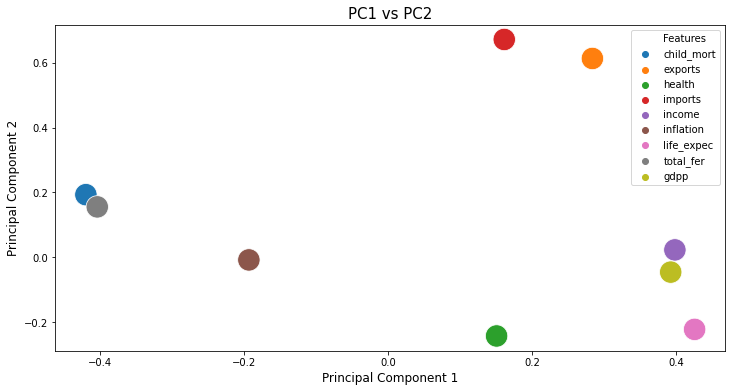

In [ ]:
#Visualize 2 main PCs,they have the highest variation.

fig = plt.figure(figsize = (12,6))
sns.scatterplot(pca_data.PC1, pca_data.PC2,hue=pca_data.Features,marker='o', s=500)
plt.title('PC1 vs PC2',fontsize=15)
plt.xlabel('Principal Component 1',fontsize=12)
plt.ylabel('Principal Component 2',fontsize=12)
plt.show()

We can see that 1st Principal Component (X-axis) is gravitated mainly towards features like: life expectancy, gdpp, income. 2nd Principal Component (Y-axis) is gravitated predominantly towards features like: imports, exports.

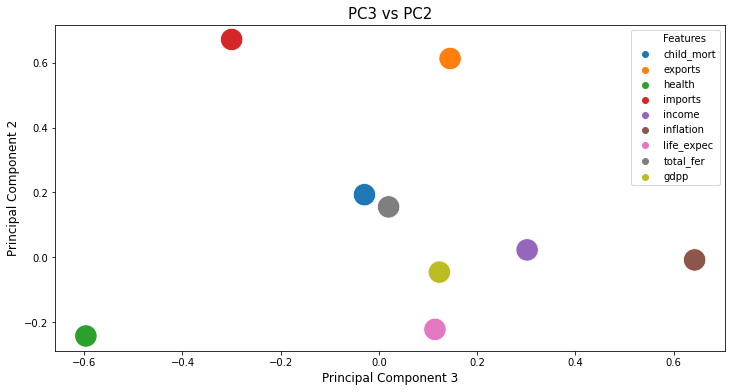

In [ ]:
# Visualize 2 main PCs, PC3 and PC2

fig = plt.figure(figsize = (12,6))
sns.scatterplot(pca_data.PC3, pca_data.PC2,hue=pca_data.Features,marker='o', s=500)
plt.title('PC3 vs PC2',fontsize=15)
plt.xlabel('Principal Component 3',fontsize=12)
plt.ylabel('Principal Component 2',fontsize=12)
plt.show()

The third principal component is more gravitated to features like inflation and income on the x -axis.

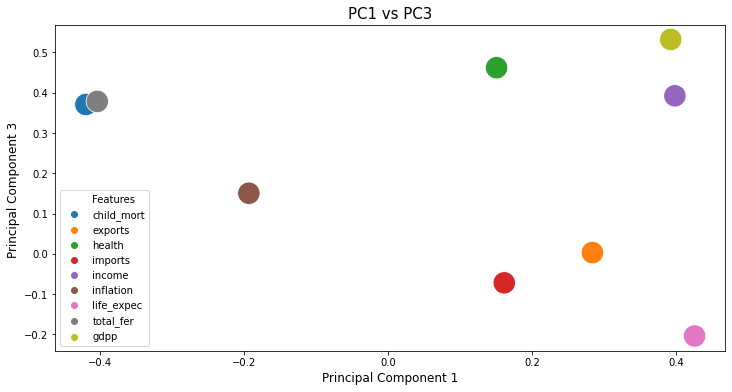

In [ ]:
#Visualize 2  PCs(PC1 vs PC3)

fig = plt.figure(figsize = (12,6))
sns.scatterplot(pca_data.PC1, pca_data.PC4,hue=pca_data.Features,marker='o', s=500)
plt.title('PC1 vs PC3',fontsize=15)
plt.xlabel('Principal Component 1',fontsize=12)
plt.ylabel('Principal Component 3 ',fontsize=12)
plt.show()

We can see that both principal components are gravitated towards features like gdpp,income and health.

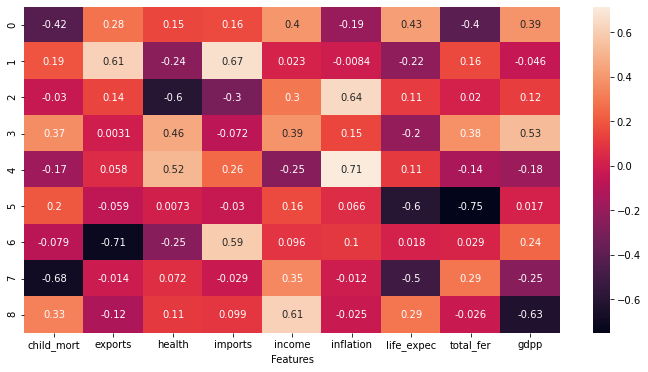

In [ ]:
# we can visualise the correlation of each principal component to the features.
map= pd.DataFrame(pca.components_,columns=pca_data['Features'])
plt.figure(figsize=(12,6))
sns.heatmap(map,annot=True)

This heatmap and the color bar basically represent the correlation between the various feature and the principal component itself.

###2. K-Means Clustering.

In [ ]:
# importing the kmeans library

from sklearn.cluster import KMeans

In [ ]:
# declaring model

kmeans = KMeans(n_clusters=5)

In [ ]:
# fitting the model

kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
# checking the centers of our cluster

kmeans.cluster_centers_

array([[1.73906977e+01, 4.55023256e+01, 6.73441860e+00, 4.56162791e+01,
        1.68255814e+04, 7.33518605e+00, 7.35418605e+01, 2.06093023e+00,
        9.26209302e+03],
       [5.08947368e+00, 5.85631579e+01, 9.35157895e+00, 4.91263158e+01,
        4.87684211e+04, 2.96010526e+00, 8.04000000e+01, 1.78684211e+00,
        4.70052632e+04],
       [5.00000000e+00, 9.23333333e+01, 6.35333333e+00, 6.47666667e+01,
        9.30000000e+04, 5.51666667e+00, 8.06000000e+01, 1.88333333e+00,
        8.77000000e+04],
       [6.25658824e+01, 3.09905765e+01, 6.12847059e+00, 4.60760694e+01,
        4.39250588e+03, 9.77842353e+00, 6.50058824e+01, 3.87164706e+00,
        1.99816471e+03],
       [1.25588235e+01, 5.20411765e+01, 7.70470588e+00, 4.85294118e+01,
        3.29823529e+04, 4.71735294e+00, 7.79764706e+01, 2.05882353e+00,
        2.59235294e+04]])

In [ ]:
# check the  cluster label

kmeans.labels_

array([3, 3, 0, 3, 0, 0, 3, 1, 1, 0, 4, 4, 3, 0, 0, 1, 3, 3, 3, 3, 3, 0,
       0, 1, 0, 3, 3, 3, 3, 1, 3, 3, 3, 0, 3, 0, 3, 3, 3, 0, 3, 0, 4, 4,
       1, 0, 3, 3, 3, 4, 3, 0, 3, 1, 1, 0, 3, 3, 1, 3, 4, 0, 3, 3, 3, 3,
       3, 0, 1, 3, 3, 0, 0, 1, 4, 4, 3, 1, 3, 0, 3, 3, 1, 3, 3, 0, 0, 3,
       3, 0, 0, 2, 0, 3, 3, 0, 0, 3, 4, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3,
       1, 4, 3, 3, 2, 4, 3, 0, 3, 3, 3, 0, 4, 2, 0, 0, 3, 3, 4, 3, 0, 0,
       3, 1, 0, 4, 3, 0, 4, 4, 3, 3, 3, 0, 1, 1, 3, 3, 0, 3, 3, 3, 3, 0,
       3, 3, 3, 1, 4, 1, 0, 3, 3, 0, 3, 3, 3], dtype=int32)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


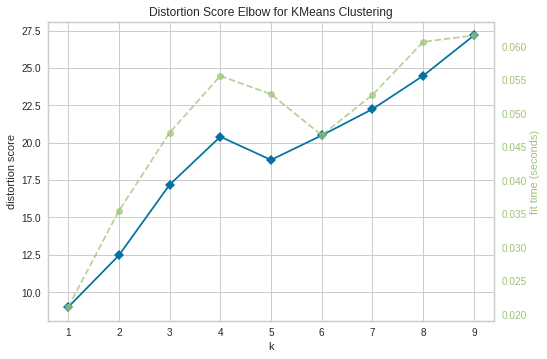

In [ ]:
# Plotting Elbow Curve

from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(df1)
visualizer.poof()

In [ ]:
#Davies bouldin score uses the similarity measure of each cluster
from sklearn.metrics import davies_bouldin_score
db = {}

In [ ]:
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=12345).fit(df1)
    if k == 4: labels = kmeans.labels_
    clusters = kmeans.labels_
     # Inertia: Sum of distances of samples to their closest cluster center
    db[k] = davies_bouldin_score(df1,clusters)


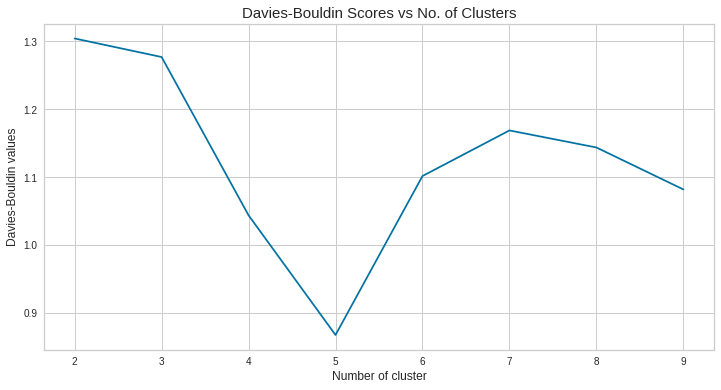

In [ ]:
#Plotting Davies-Bouldin Scores
plt.figure(figsize=(12,6))
plt.plot(list(db.keys()), list(db.values()))
plt.xlabel("Number of cluster", fontsize=12)
plt.ylabel("Davies-Bouldin values", fontsize=12)
plt.title("Davies-Bouldin Scores vs No. of Clusters", fontsize=15)
plt.show()

Value for k that we will use is k = 3.

Silhouette score

----------------------------------------------------------------------------------------------------


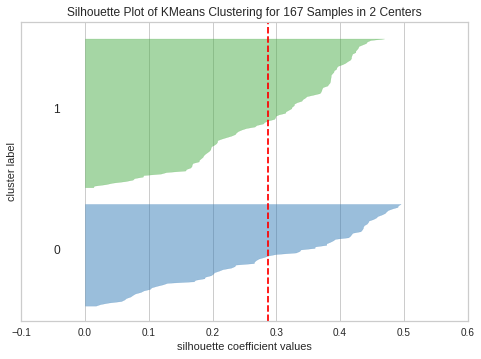

----------------------------------------------------------------------------------------------------


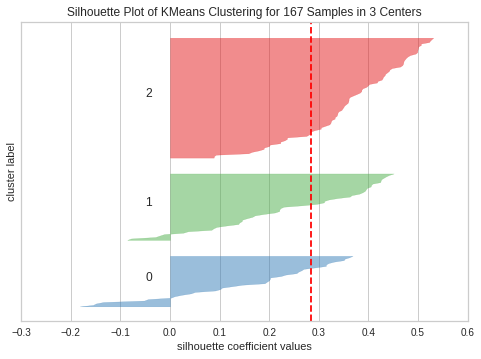

----------------------------------------------------------------------------------------------------


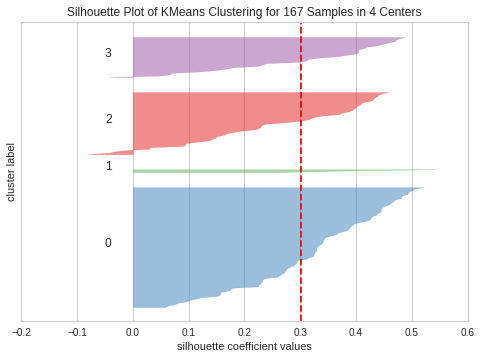

In [ ]:
# To determine the optimal number of scores, we apply the silhouette score

from yellowbrick.cluster import SilhouetteVisualizer

clusters = [2,3,4]

for cluster in clusters:

    print('-'*100)

    # define the model for K
    kmeans = KMeans(n_clusters = cluster, random_state=0)

    # pass the model through the visualizer
    visualizer = SilhouetteVisualizer(kmeans)

    # fit the data
    visualizer.fit(df1)

    # show the chart
    visualizer.poof()

From our silhouette score, we can see that the optimal k is 3, the values in each value is above 0, means they are not close to the decision boundary.

Each cluster is above the silhouette score which we can check that using the red dotted line.

The negative values indicate the samples that have been wrongly clustered.

k = 3 cluster has an even distribution compared to the rest.

Our optimal k= 3

In [ ]:
# apply the kmeans clustering to the data and get the labels of which cluster each country falls into

kmeans = KMeans(n_clusters=3, random_state=0).fit(df1)
country['cluster'] = kmeans.labels_
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


In [ ]:
# we can group only cluster 1

country[country['cluster'] == 0][:10]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,0
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,0
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,0
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,0
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,0
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,0
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,0
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,0


From our first cluster:
- countries in this cluster have higher exports to imports.

- Life expectancy is high 75+ years.

- Have high gdp and income is relatively high.

- The child mortality is low.

In [ ]:
# Printing out the second cluster

country[country['cluster'] == 1][:10]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,1
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,1
21,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,1
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,1
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,1
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,1
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,1
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,1
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,1


In our second cluster:

- We have high import rate than export.

- We have very high child mortality.

- The life expectancy is 66 and below.

- The gdp and income are relatively low.

In [ ]:
# Printing the 3rd cluster

country[country['cluster'] == 2][:10]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,2
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,2
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,2
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,2
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,2
12,Bangladesh,49.4,16.0,3.52,21.8,2440,7.140,70.4,2.33,758,2
13,Barbados,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78,16000,2
14,Belarus,5.5,51.4,5.61,64.5,16200,15.100,70.4,1.49,6030,2


By looking at the output of the countries in each cluster, combined with our knowledge on some of the countries. We can see that:

Cluster 1 are those developed countries, most of which are in Europe, North America and some part of Asia
Cluster 2 are those less developed countries, most of which are in Africa
Cluster 3 are those developing countries, most of which are in South America and Asia

## Challenging the Solution

### Hierarchical Clustering

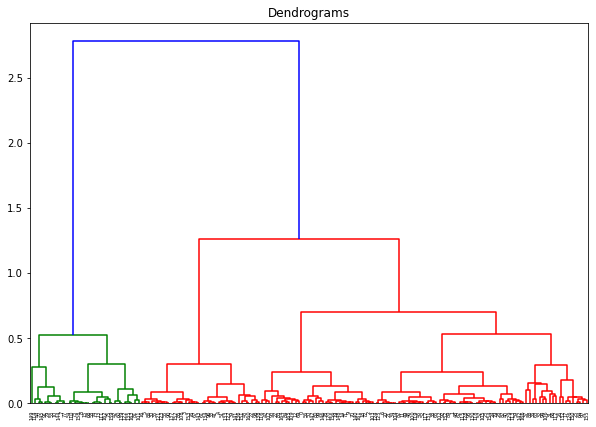

In [ ]:
#Drawing the dendrogram
#

import scipy.cluster.hierarchy as shc


plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(df_final, method='ward'))

Once one big cluster is formed, the longest vertical distance without any horizontal line passing through it is selected and a horizontal line is drawn through it. The number of vertical lines this newly created horizontal line passes is equal to number of clusters.

1. Distance of 1.0

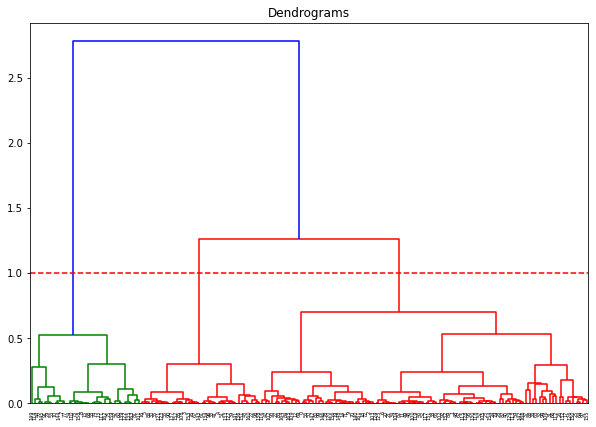

In [ ]:
# Drawing the dendrogram, and specifying the distance

plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(df_final, method='ward'))
plt.axhline(y=1.0, color='r', linestyle='--')

With a distance of 1.0, three clusters are ideal.

In [ ]:
#Applying hierarchical clustering for 3 clusters
#
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(df_final)

array([0, 0, 0, 2, 2, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 2, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0,
       0, 2, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0,
       0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 2, 1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2,
       0, 0, 0, 2, 1, 1, 2, 0, 1, 1, 0, 0, 0])

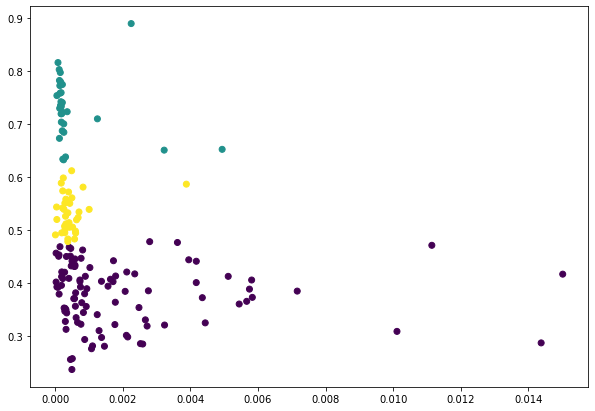

In [ ]:
# Visualizing the clusters

plt.figure(figsize=(10, 7))
plt.scatter(df_final['health'], df_final['gdpp'], c=cluster.labels_)

2. Distance of 0.5

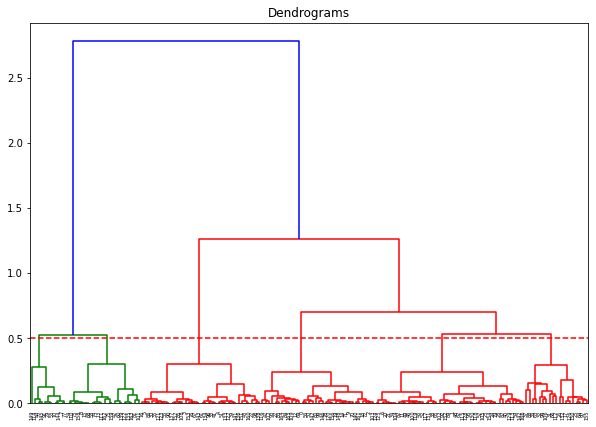

In [ ]:
#Drawing the dendrogram, and specifying the distance
# 0.5

plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(df_final, method='ward'))
plt.axhline(y=0.5, color='r', linestyle='--')

3. Distance of 0.6

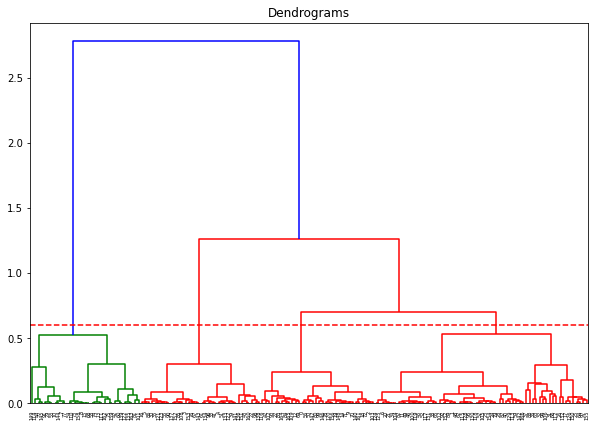

In [ ]:
#Drawing the dendrogram, and specifying the distance
# 0.6

plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(df_final, method='ward'))
plt.axhline(y=0.6, color='r', linestyle='--')

With a distance of 0.6, four clusters are ideal.

In [ ]:
#Applyind hierarchical clustering for 6 clusters
#

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit_predict(df_final)

array([3, 0, 3, 2, 2, 2, 0, 1, 1, 3, 1, 0, 3, 1, 3, 1, 2, 0, 3, 3, 0, 0,
       2, 0, 0, 0, 0, 3, 0, 1, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 0, 0, 3, 0, 0, 3, 2, 0, 1, 1, 2, 3, 0, 1, 0, 1, 2, 0, 0, 0, 0,
       0, 2, 1, 3, 3, 3, 3, 1, 1, 1, 2, 1, 3, 0, 3, 1, 0, 3, 3, 2, 2, 0,
       0, 0, 2, 1, 0, 3, 0, 0, 2, 0, 2, 3, 0, 1, 0, 3, 0, 0, 0, 3, 2, 3,
       1, 1, 0, 0, 1, 0, 3, 0, 0, 0, 3, 2, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 2, 1, 2, 2, 2, 1, 3, 2, 0, 2, 1, 1, 3, 3, 3, 1, 0, 2, 0, 2,
       0, 0, 3, 2, 1, 1, 2, 3, 1, 1, 3, 3, 0])

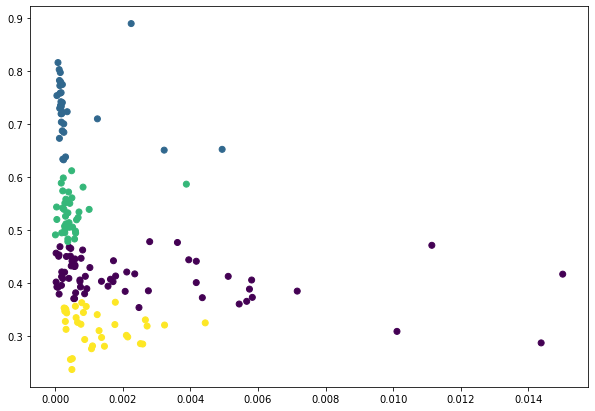

In [ ]:
#Visualizing the clusters
#

plt.figure(figsize=(10, 7))
plt.scatter(df_final['health'], df_final['gdpp'], c=cluster.labels_)

A distance of 1.0 which produced 3 clusters seems to be doing a better job at classtering the data compared to the distance of 0.5 which produced 6 clusters. This suggests that our K-Means equally did a good job while clustering.

## Conclusion

1. The best cluster to use was 3 as highlighted by the Kmeans and hierachical clustering
2. Countries from our first cluster had:
  - higher exports to imports.

  - a life expectancy is high 75+ years.

  - high gdp and income that is relatively high.

  - The child mortality is low.

  Cluster 1 are those developed countries, most of which are in Europe, North America and some part of Asia

3. Countries from our second cluster:

  - We have high import rate than export.

  - We have very high child mortality.

  - The life expectancy is 66 and below.

  - The gdp and income are relatively low.

  Cluster 2 are those less developed countries, most of which are in Africa.

4. Cluster 3 are those developing countries, most of which are in South America and Asia

## Recommendations



1. Help International should focus its efforts to countries in cluster 2. These countries are less developed such as Botswana, Burundi, Cameroon and Central African Republic.

2. Help International should specifically focus on reducing child mortality rates in these less developed countries such as Haiti and Chad.

3. The NGO should concentrate its effort towards alleviating poverty in the less developed countries as they had the lowest levels of income.

4. The NGO should advocate for better methods of production since the less developed countries had lower GDP per capita as compared to other countries while having the highest levels of fertility.

## Follow up Questions

1. Did we have the right data?
  Yes, we had the right data.

2. Did we have the right question?
Yes, we had the right question.
